In [0]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout


In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [0]:
# Multilayer perceptron

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(input_dim,)))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total para

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.4474 - acc: 0.8659 - val_loss: 0.1542 - val_acc: 0.9530
Epoch 2/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.2195 - acc: 0.9352 - val_loss: 0.1128 - val_acc: 0.9647
Epoch 3/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.1706 - acc: 0.9487 - val_loss: 0.0998 - val_acc: 0.9692
Epoch 4/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.1479 - acc: 0.9558 - val_loss: 0.0908 - val_acc: 0.9722
Epoch 5/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.1276 - acc: 0.9609 - val_loss: 0.0788 - val_acc: 0.9754
Epoch 6/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.1146 - acc: 0.9649 - val_loss: 0.0751 - val_acc: 0.9765
Epoch 7/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.1072 - acc: 0.9673 - val_loss: 0.0716 - va

Test score: 0.06095009959817398
Test accuracy: 0.9831


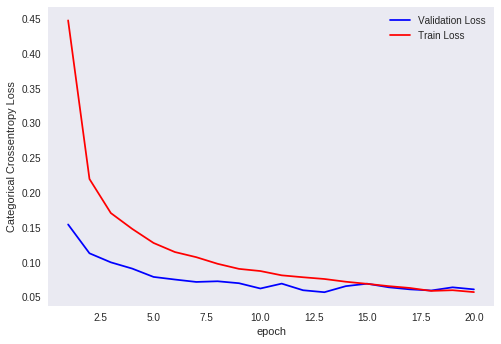

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**MODEL** -**2**

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
__________

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 225us/step - loss: 0.4087 - acc: 0.8763 - val_loss: 0.1324 - val_acc: 0.9591
Epoch 2/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.1848 - acc: 0.9448 - val_loss: 0.1080 - val_acc: 0.9674
Epoch 3/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.1442 - acc: 0.9575 - val_loss: 0.0853 - val_acc: 0.9740
Epoch 4/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.1225 - acc: 0.9625 - val_loss: 0.0765 - val_acc: 0.9753
Epoch 5/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.1070 - acc: 0.9674 - val_loss: 0.0791 - val_acc: 0.9752
Epoch 6/20
60000/60000 [==============================] - 12s 202us/step - loss: 0.0978 - acc: 0.9696 - val_loss: 0.0652 - val_acc: 0.9794
Epoch 7/20
60000/60000 [==============================] - 12s 202us/step - loss: 0.0911 - acc: 0.9724 - val_loss: 0.

Test score: 0.05432565987041453
Test accuracy: 0.984


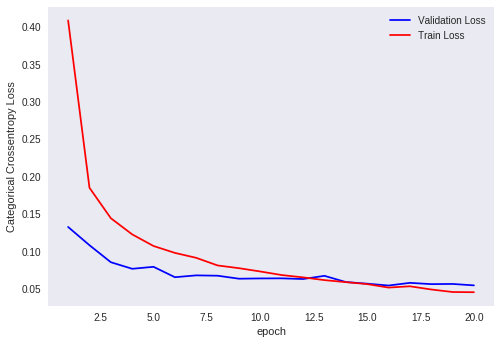

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**MODEL - 3**

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_10 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
__________

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 251us/step - loss: 0.9089 - acc: 0.7218 - val_loss: 0.2065 - val_acc: 0.9420
Epoch 2/20
60000/60000 [==============================] - 13s 210us/step - loss: 0.3295 - acc: 0.9166 - val_loss: 0.1533 - val_acc: 0.9582
Epoch 3/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.2482 - acc: 0.9384 - val_loss: 0.1159 - val_acc: 0.9685
Epoch 4/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.2113 - acc: 0.9480 - val_loss: 0.1051 - val_acc: 0.9724
Epoch 5/20
60000/60000 [==============================] - 13s 211us/step - loss: 0.1883 - acc: 0.9534 - val_loss: 0.0979 - val_acc: 0.9744
Epoch 6/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.1639 - acc: 0.9600 - val_loss: 0.0940 - val_acc: 0.9761
Epoch 7/20
60000/60000 [==============================] - 13s 211us/step - loss: 0.1475 - acc: 0.9640 - val_loss: 0.

Test score: 0.07582580575374887
Test accuracy: 0.982


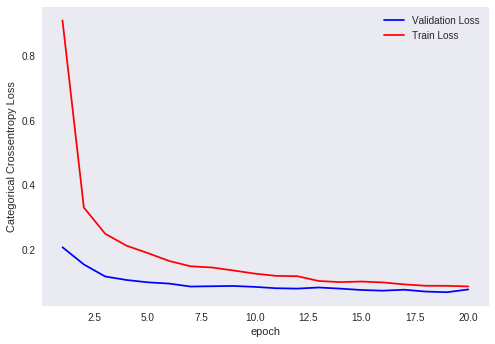

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)